# code done better

In [1]:
#importo le librerie che andrò ad utilizzare.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#To visualize the whole grid
#pd.options.display.max_columns = 999#Kaggle divides the dataset already into X_train and Test data
#leggo il file csv utilizzando la libreria panda

data=pd.read_csv("BlackFriday.csv")


In [2]:
# Check for duplicates
idsUnique = len(set(data.User_ID))
idsTotal = data.shape[0]
idsDupli = idsTotal-idsUnique
print("There are :" , idsDupli , " duplicate IDs for " , idsTotal , " total entries")

There are : 531686  duplicate IDs for  537577  total entries


## analisi dei dati 

Text(0.5, 1.0, 'Purchase amount Distribution')

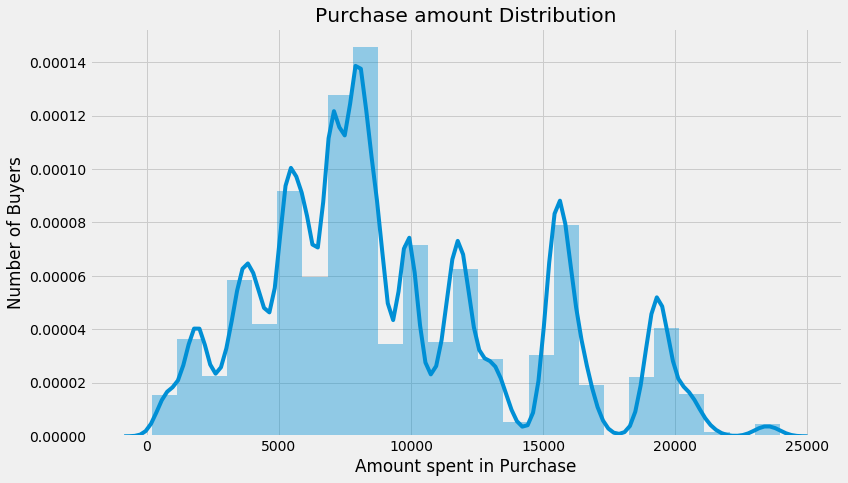

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [4]:
print ("Skew is:", data.Purchase.skew())
print("Kurtosis: %f" % data.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


In [5]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

##### conteggio delle variabili indipendenti

rispetto alla occupazione

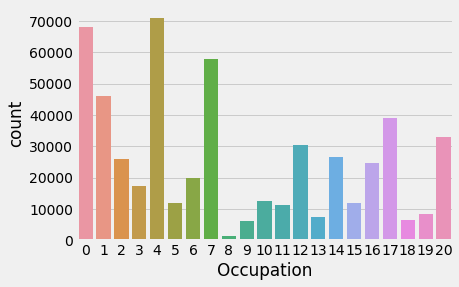

In [6]:
sns.countplot(data.Occupation)

#### Costruzione della matrice di correlazione

In [7]:
corr = numeric_features.corr()
print(corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64


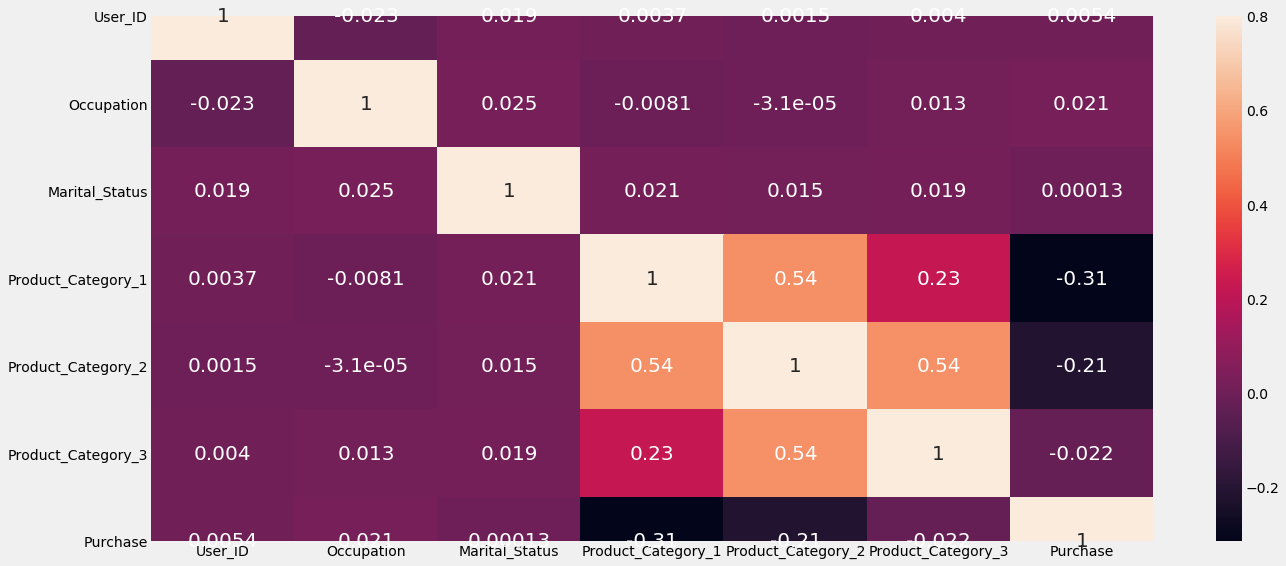

In [8]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=0.8,annot_kws={'size': 20}, annot=True);

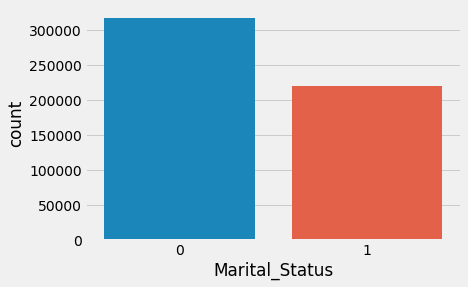

In [9]:
#conteggio ordini maschi femmine
sns.countplot(data.Marital_Status)

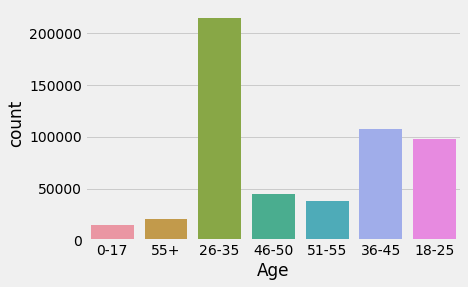

In [10]:
#conteggio ordini in base all'età
sns.countplot(data.Age)

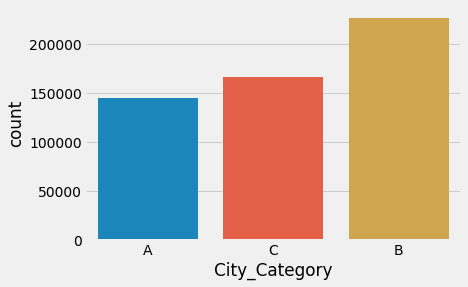

In [11]:
#conteggio ordini rispetto alla categoria della città
sns.countplot(data.City_Category)

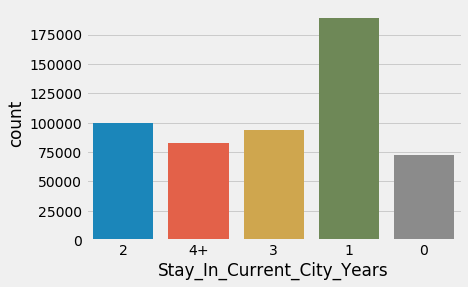

In [12]:
#in base da quanto tempo abitano in quella città
sns.countplot(data.Stay_In_Current_City_Years)

### Rispetto alla spesa

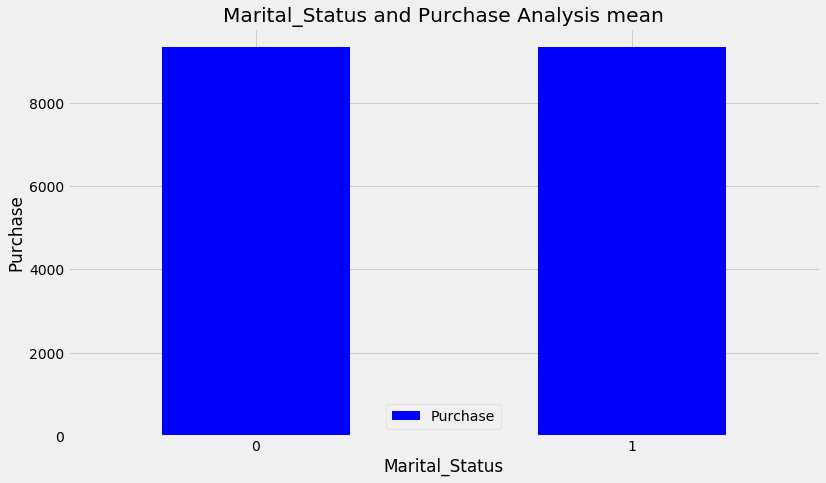

In [13]:
# media rispetto al sesso
Occupation_pivot = \
data.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis mean")
plt.xticks(rotation=0)
plt.show()

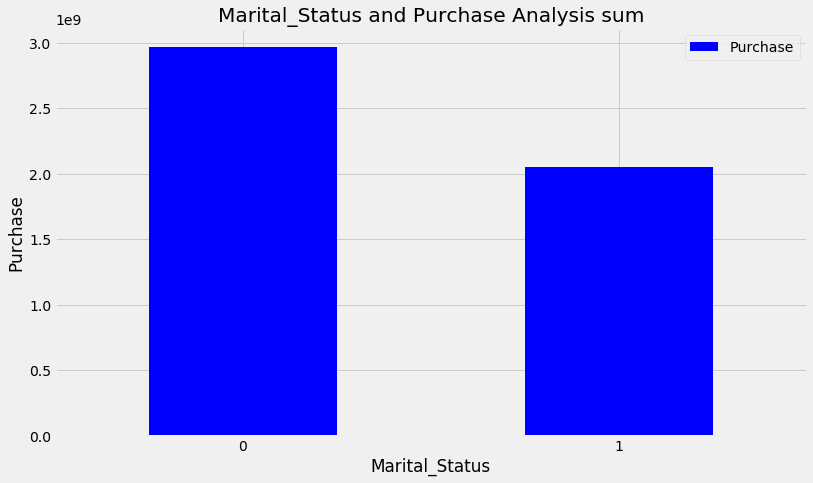

In [14]:
# media rispetto al sesso
Occupation_pivot = \
data.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.sum)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis sum")
plt.xticks(rotation=0)
plt.show()

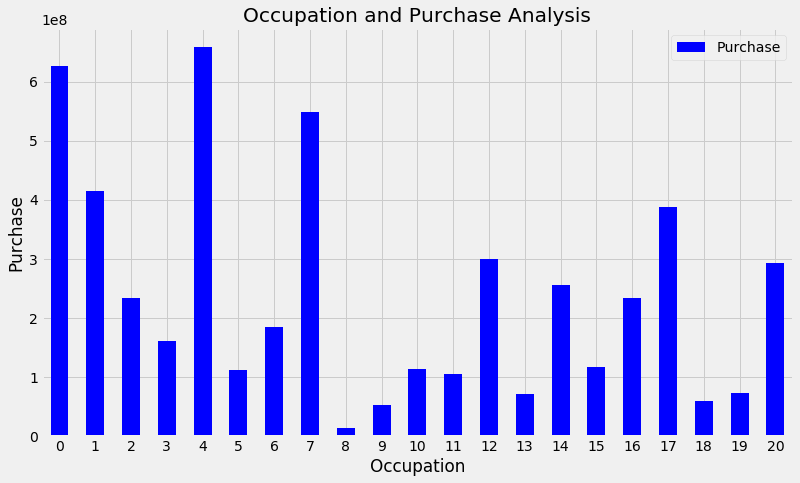

In [15]:
Occupation_pivot = \
data.pivot_table(index='Occupation', values="Purchase", aggfunc=np.sum)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

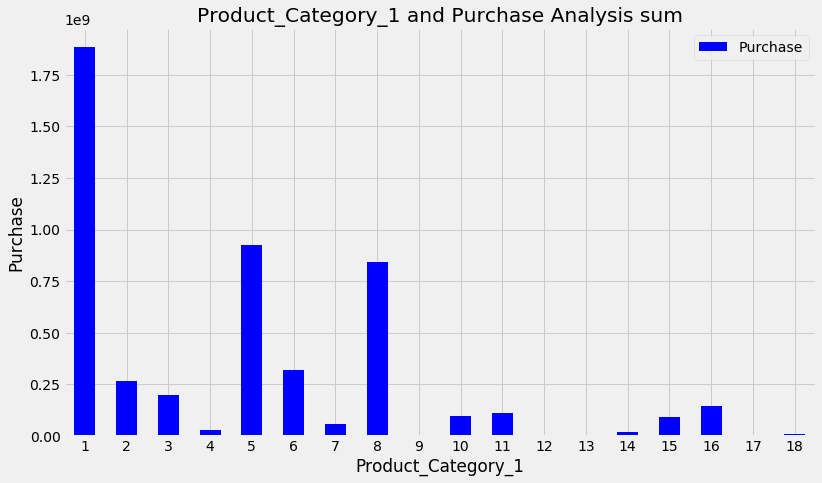

In [16]:
Occupation_pivot = \
data.pivot_table(index='Product_Category_1', values="Purchase",  aggfunc=np.sum)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis sum")
plt.xticks(rotation=0)
plt.show()

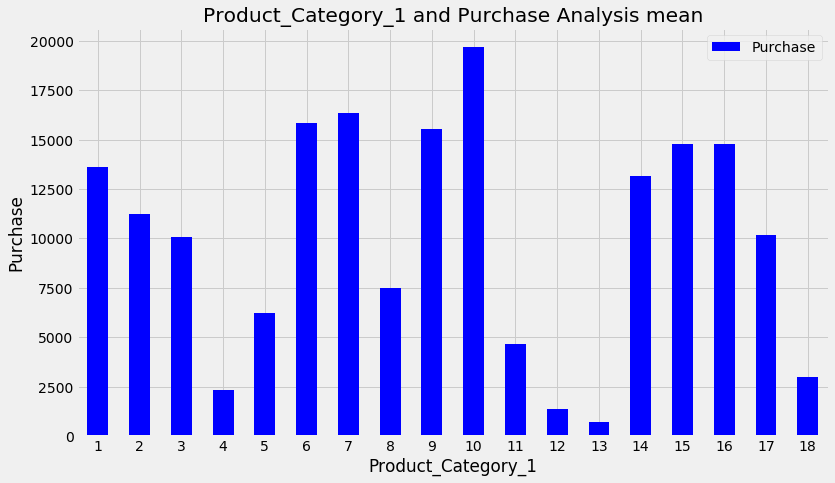

In [17]:
Occupation_pivot = \
data.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis mean")
plt.xticks(rotation=0)
plt.show()

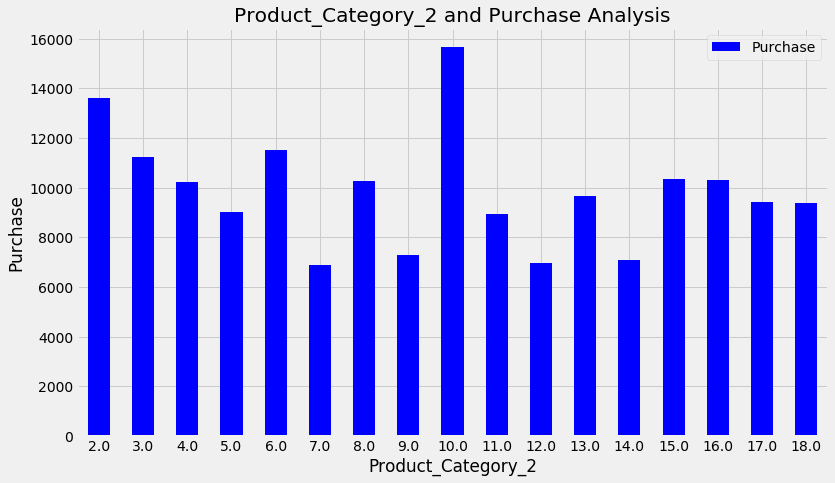

In [18]:
Occupation_pivot = \
data.pivot_table(index='Product_Category_2', values="Purchase",  aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

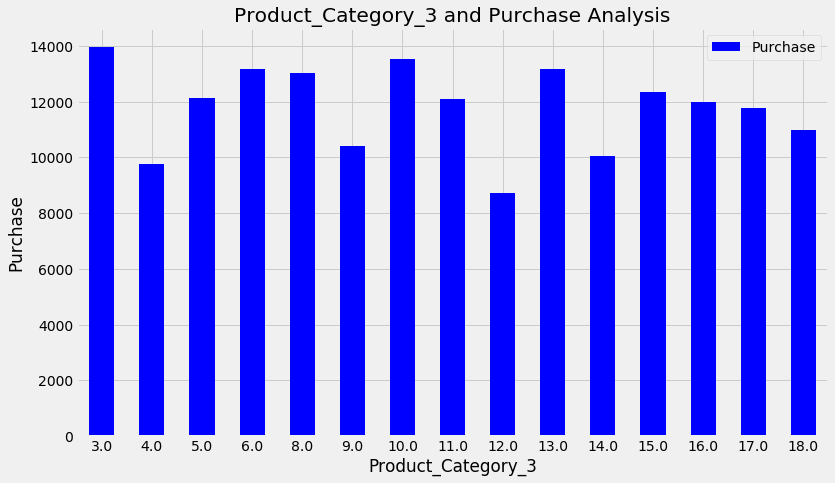

In [19]:
Occupation_pivot = \
data.pivot_table(index='Product_Category_3', values="Purchase",  aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [20]:
#presenza delle variabili nulle
data.isnull().sum()#/data.shape[0]*100

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [21]:
#Define target and ID columns:
#target = 'Item_Outlet_Sales'
#IDcol = ['Item_Identifier','Outlet_Identifier']#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, dX_train, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    risultato=alg.fit(dX_train[predictors], dX_train[target])
        
    #Predict X_training set:
    dX_train_predictions = alg.predict(dX_train[predictors])#Perform cross-validation:
    cv_score = cross_val_score(alg, dX_train[predictors],(dX_train[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dX_train[target]).values, dX_train_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    ZXCVBN=risultato.score(dtest[predictors],dtest[target])
    #Predict on testing data:
    #dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)
    return ZXCVBN

In [22]:
#generazione per facilitare l'elaborazione al pc

In [23]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])
data["Gender"].value_counts()

1    405380
0    132197
Name: Gender, dtype: int64

In [24]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])
data["Age"].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

In [25]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])
data["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

#### Comportarsi
si vede che sono presenti delle variabili nn conosciute:
si suppone che le variabili possono esser etrascurate ma per esserlo devono avere un valore fissato e diverso da NaN

In [26]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#New variable for outlet
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])
data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [27]:
#eliminazione delle collonne della categoria 2,3
data_no23=data.drop(['User_ID','Product_ID', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [28]:
X_train_no23, X_test_no23= train_test_split(data_no23,test_size=0.2)

In [29]:
predictors = X_train_no23.columns.drop(['Purchase'])

from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

ZXCV=modelfit(LR, X_train_no23, X_test_no23, predictors, target, IDcol, 'LR.csv')
print(ZXCV)

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
ZXCV=modelfit(DT, X_train_no23, X_test_no23, predictors, target, IDcol, 'DT.csv')
print(ZXCV)


RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
ZXCV=modelfit(RF, X_train_no23, X_test_no23, predictors, target, IDcol, 'RF.csv')
print(ZXCV);
#lr = LinearRegression()
#fit1 = lr.fit(X_train_no23[''],X_train_no23['Purchase'])
#dtr = DecisionTreeRegressor()
#fit2 = dtr.fit(X_train_no23[''],X_train_no23['Purchase'])
#rfr = RandomForestRegressor()
#fit3 = rfr.fit(X_train_no23[''],X_train_no23['Purchase'])
#gbr = GradientBoostingRegressor()
#fit4 = gbr.fit(X_train_no23[''],X_train_no23['Purchase'])

#print("Accuracy Score of Linear regression on test set",fit1.score(X_train_no23,X_train_no23['Purchase'])*100)
#print("Accuracy Score of Decision Tree on test set",fit2.score(X_train_no23,X_train_no23['Purchase'])*100)
#print("Accuracy Score of Random Forests on test set",fit3.score(X_train_no23,X_train_no23['Purchase'])*100)
#print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_train_no23,X_train_no23['Purchase'])*100)


Model Report
RMSE : 4712
CV Score : Mean - 4713 | Std - 27.36 | Min - 4670 | Max - 4782
0.1083205148941514

Model Report
RMSE : 2959
CV Score : Mean - 2983 | Std - 16.36 | Min - 2951 | Max - 3021
0.641737006576352

Model Report
RMSE : 3010
CV Score : Mean - 3015 | Std - 16.54 | Min - 2990 | Max - 3056
0.6334787646035169


In [30]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

-2.0     166986
 2.0      48481
 3.0       2835
 4.0      25225
 5.0      25874
 6.0      16251
 7.0        615
 8.0      63058
 9.0       5591
 10.0      2991
 11.0     13945
 12.0      5419
 13.0     10369
 14.0     54158
 15.0     37317
 16.0     42602
 17.0     13130
 18.0      2730
Name: Product_Category_2, dtype: int64

In [31]:
data["Product_Category_3"]= \
data["Product_Category_3"].fillna(-2.0).astype("float")
data.Product_Category_3.value_counts().sort_index()
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,7969,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,2,0,1,2.0,-2.0,11664,0,1,0,0,0
537573,1004737,P00111142,1,3,16,2,0,1,15.0,16.0,19196,0,1,0,0,0
537574,1004737,P00345942,1,3,16,2,0,8,15.0,-2.0,8043,0,1,0,0,0
537575,1004737,P00285842,1,3,16,2,0,5,-2.0,-2.0,7172,0,1,0,0,0


In [32]:
#divido i dati in 2 categorie  una per far imparare alla macchina il predittore una per testare il predittore utilizzato
X_train_df, X_test_df= train_test_split(data,test_size=0.2)
X_train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
464788,1005595,P00266642,1,2,20,1,0,1,8.0,9.0,15912,0,1,0,0,0
157475,1000319,P00334242,0,5,6,1,1,1,8.0,-2.0,15552,0,0,0,1,0
117737,1000163,P00252042,1,1,4,0,0,5,14.0,-2.0,3673,0,1,0,0,0
98887,1003336,P00227642,1,3,17,1,1,1,5.0,14.0,4237,0,0,1,0,0
231461,1005689,P00148342,1,2,0,1,0,5,-2.0,-2.0,5297,0,0,0,1,0


In [33]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = X_train_df.columns.drop(['Purchase','Product_ID','User_ID'])
print(predictors)


Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4'],
      dtype='object')



Model Report
RMSE : 4633
CV Score : Mean - 4633 | Std - 25.1 | Min - 4589 | Max - 4692
0.13996255843478733


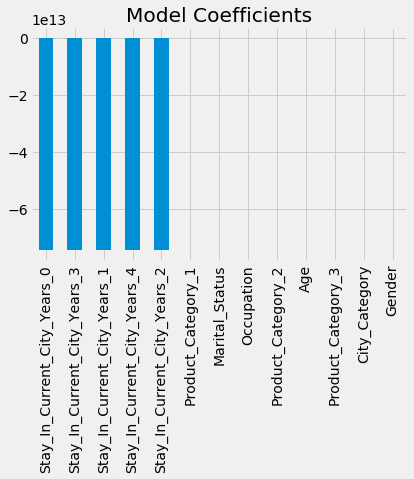

In [34]:
ZXCV=modelfit(LR, X_train_df, X_test_df, predictors, target, IDcol, 'LR.csv')
print(ZXCV)
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [35]:
#Get index of all columns with product_category_1 equal 19 or 20 from X_train
#condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "X_train")]
#data = data.drop(condition)
#data=X_train

In [36]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
        count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [37]:
#data["User_ID_Count"] = getCountVar(data, data, "User_ID")
data["Age_Count"] =getCountVar(data, data, "Age")
data["Occupation_Count"] =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"] =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"] =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"] =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"] =getCountVar(data, data, "Product_ID")


In [38]:
#Divide into test and X_train:
#X_train = data.loc[data['source']=="X_train"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 22 columns):
User_ID                         537577 non-null int64
Product_ID                      537577 non-null object
Gender                          537577 non-null int64
Age                             537577 non-null int64
Occupation                      537577 non-null int64
City_Category                   537577 non-null int64
Marital_Status                  537577 non-null int64
Product_Category_1              537577 non-null int64
Product_Category_2              537577 non-null float64
Product_Category_3              537577 non-null float64
Purchase                        537577 non-null int64
Stay_In_Current_City_Years_0    537577 non-null uint8
Stay_In_Current_City_Years_1    537577 non-null uint8
Stay_In_Current_City_Years_2    537577 non-null uint8
Stay_In_Current_City_Years_3    537577 non-null uint8
Stay_In_Current_City_Years_4    537577 non-null uint8
Age_Count           

Purchase                        1.000000
Product_ID_Count                0.328692
Product_Category_3              0.289656
City_Category                   0.068507
Product_Category_2              0.063998
Gender                          0.060086
Occupation                      0.021104
Age                             0.017717
Stay_In_Current_City_Years_2    0.006098
User_ID                         0.005389
Name: Purchase, dtype: float64 

Stay_In_Current_City_Years_4    0.001072
Marital_Status                  0.000129
Stay_In_Current_City_Years_1   -0.002070
Occupation_Count               -0.003300
Age_Count                      -0.003913
Stay_In_Current_City_Years_0   -0.006878
Product_Category_1_Count       -0.060041
Product_Category_2_Count       -0.210528
Product_Category_3_Count       -0.308971
Product_Category_1             -0.314125
Name: Purchase, dtype: float64


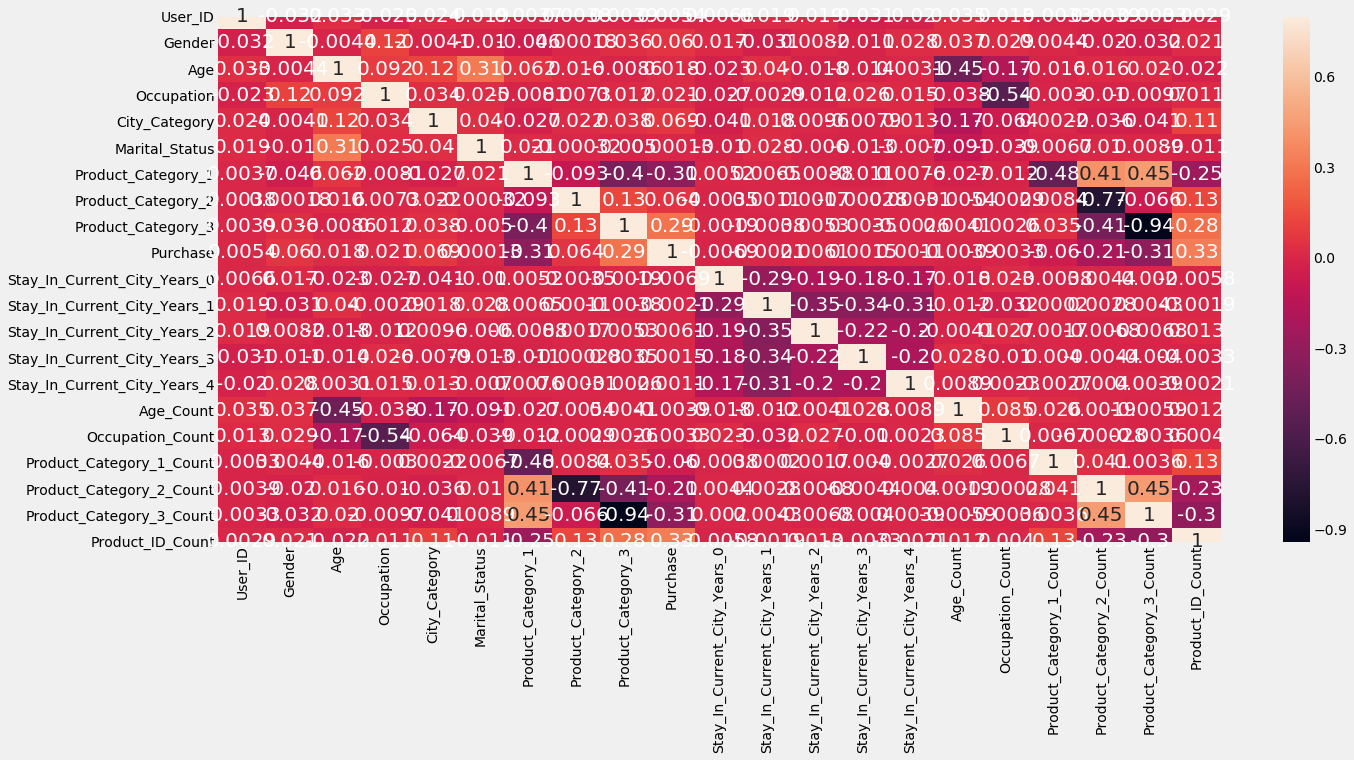

In [39]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes
corr = numeric_features.corr()
print(corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=0.8,annot_kws={'size': 20}, annot=True);

In [40]:
#divido i dati in 2 categorie  una per far imparare alla macchina il predittore una per testare il predittore utilizzato
X_train, X_test= train_test_split(data,test_size=0.2)
X_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
431129,1000354,P00010742,1,3,1,0,0,1,8.0,17.0,...,1,0,0,0,107499,45971,138353,63058,16449,1331
57322,1002859,P00184942,1,1,1,2,0,1,8.0,17.0,...,0,0,0,0,97634,45971,138353,63058,16449,1424
382416,1004819,P00191342,1,3,18,1,0,2,4.0,9.0,...,1,0,0,0,107499,6525,23499,25225,11414,140
48434,1001426,P00178942,1,1,14,1,0,5,8.0,-2.0,...,0,0,1,0,97634,26712,148592,63058,373299,824
149383,1005053,P00129542,1,2,4,2,0,8,14.0,-2.0,...,0,0,1,0,214690,70862,112132,54158,373299,733


In [41]:
#data['source']

In [42]:
#test = data.loc[data['source']=="X_test"]#Drop unnecessary columns:
#test.info()
test=X_test

In [43]:

#test.drop(['source'],axis=1,inplace=True)
#X_train.drop(['source'],axis=1,inplace=True)#Export files as modified versions:
X_train.to_csv("X_train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [44]:
X_train_df = pd.read_csv('X_train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = X_train_df.columns.drop(['Purchase','Product_ID','User_ID'])
print(predictors)


Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4', 'Age_Count', 'Occupation_Count',
       'Product_Category_1_Count', 'Product_Category_2_Count',
       'Product_Category_3_Count', 'Product_ID_Count'],
      dtype='object')


In [46]:
#test_df.info()
X_train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000354,P00010742,1,3,1,0,0,1,8.0,17.0,...,1,0,0,0,107499,45971,138353,63058,16449,1331
1,1002859,P00184942,1,1,1,2,0,1,8.0,17.0,...,0,0,0,0,97634,45971,138353,63058,16449,1424
2,1004819,P00191342,1,3,18,1,0,2,4.0,9.0,...,1,0,0,0,107499,6525,23499,25225,11414,140
3,1001426,P00178942,1,1,14,1,0,5,8.0,-2.0,...,0,0,1,0,97634,26712,148592,63058,373299,824
4,1005053,P00129542,1,2,4,2,0,8,14.0,-2.0,...,0,0,1,0,214690,70862,112132,54158,373299,733
5,1000169,P00010842,1,2,7,1,0,8,16.0,-2.0,...,0,0,1,0,214690,57806,112132,42602,373299,662
6,1003036,P00102342,1,6,13,2,0,8,14.0,17.0,...,1,0,0,0,20903,7548,112132,54158,16449,668
7,1001880,P00147642,1,3,0,1,1,1,2.0,-2.0,...,0,0,1,0,107499,68120,138353,48481,373299,59
8,1003904,P00182442,1,0,10,2,0,5,11.0,-2.0,...,1,0,0,0,14707,12623,148592,13945,373299,399
9,1005900,P00143142,1,2,7,2,0,8,14.0,-2.0,...,1,0,0,0,214690,57806,112132,54158,373299,67



Model Report
RMSE : 4340
CV Score : Mean - 4340 | Std - 21.9 | Min - 4297 | Max - 4377
0.24271343899715636


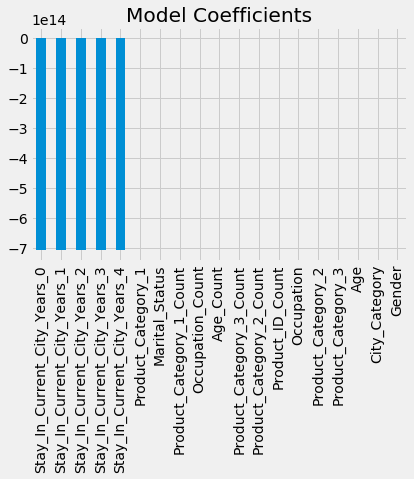

In [47]:
ZXCV=modelfit(LR, X_train_df, test_df, predictors, target, IDcol, 'LR.csv')
print(ZXCV)
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [48]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, X_train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 4346
CV Score : Mean - 4346 | Std - 21.23 | Min - 4305 | Max - 4383


0.23994391565980933

In [49]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, X_train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 2692
CV Score : Mean - 2730 | Std - 12.36 | Min - 2713 | Max - 2760


0.7010039533800194

In [50]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, X_train_df, test_df, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 2804
CV Score : Mean - 2808 | Std - 12.07 | Min - 2787 | Max - 2836


0.6824858780794752

In [51]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train_df[predictors], X_train_df[target], early_stopping_rounds=5, eval_set=[(test_df[predictors], test_df[target])], verbose=False)

/home/michele/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/michele/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:46:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
#Predict X_training set:
X_train_df_predictions = my_model.predict(X_train_df[predictors])# make predictions
predictions = my_model.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((X_train_df[target]).values, X_train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoost.csv", index=False)

Mean Absolute Error : 2078.6202700922317
RMSE : 2762


In [57]:
target = ['Product_Category_1']
IDcol = ['User_ID','Product_ID']
data_no23=data.drop(['User_ID','Product_ID', 'Product_Category_2', 'Product_Category_3','Product_Category_1_Count', 'Product_Category_2_Count', 'Product_Category_3_Count', 'Product_ID_Count'], axis=1)
X_train_df, X_tes_dft= train_test_split(data_no23,test_size=0.7)
data_no23.info()

from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors_category = X_train_df.columns.drop(['Product_Category_1'])
print(predictors)

ZXCV=modelfit(LR, X_train_df, test_df, predictors_category, target, IDcol, 'LR.csv')
print(ZXCV)
#coef1 = pd.Series(LR.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100)
ZXCV=modelfit(DT, X_train_df, test_df, predictors_category, target, IDcol, 'DT.csv')
print(ZXCV)

RF = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150)
ZXCV=modelfit(RF, X_train_df, test_df, predictors_category, target, IDcol, 'RF.csv')
print(ZXCV)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
Gender                          537577 non-null int64
Age                             537577 non-null int64
Occupation                      537577 non-null int64
City_Category                   537577 non-null int64
Marital_Status                  537577 non-null int64
Product_Category_1              537577 non-null int64
Purchase                        537577 non-null int64
Stay_In_Current_City_Years_0    537577 non-null uint8
Stay_In_Current_City_Years_1    537577 non-null uint8
Stay_In_Current_City_Years_2    537577 non-null uint8
Stay_In_Current_City_Years_3    537577 non-null uint8
Stay_In_Current_City_Years_4    537577 non-null uint8
Age_Count                       537577 non-null int64
Occupation_Count                537577 non-null int64
dtypes: int64(9), uint8(5)
memory usage: 39.5 MB
Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Pro